In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, chi2_contingency
import seaborn as sns

from sklearn.feature_selection import f_regression


In [2]:
df_tool=pd.read_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\TOOLBOX_1\data_science_salaries.csv")

In [3]:
df_prueba=pd.read_excel(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\TOOLBOX_1\titanic_encoder.xlsx")

In [4]:
df_tool.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [5]:
df_tool.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11087 entries, 0 to 11086
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           11087 non-null  object
 1   experience_level    11087 non-null  object
 2   employment_type     11087 non-null  object
 3   work_models         11087 non-null  object
 4   work_year           11087 non-null  int64 
 5   employee_residence  11087 non-null  object
 6   salary              11087 non-null  int64 
 7   salary_currency     11087 non-null  object
 8   salary_in_usd       11087 non-null  int64 
 9   company_location    11087 non-null  object
 10  company_size        11087 non-null  object
dtypes: int64(3), object(8)
memory usage: 952.9+ KB


In [6]:
df_tool.work_year.unique()

array([2024, 2023, 2022, 2021, 2020], dtype=int64)

In [7]:
df_gold= pd.read_excel(r"D:\Cursos\REPOSITORIOS\DATASET\gold_price.xlsx")

In [8]:
df_gold.head()

,J-Date,Date,Weekday,Open,High,Low,Close,Symbol
0,1389-01-15,4/4/2010,Sunday,2680000,2680000,2680000,2680000,سکه امامی
1,1389-01-16,4/5/2010,Monday,2680000,2680000,2680000,2680000,سکه امامی
2,1389-01-17,4/6/2010,Tuesday,2680000,2680000,2680000,2680000,سکه امامی
3,1389-01-18,4/7/2010,Wednesday,2710000,2710000,2710000,2710000,سکه امامی
4,1389-01-20,4/9/2010,Friday,2720000,2720000,2720000,2720000,سکه امامی


In [9]:
df_gold.drop(columns={"J-Date","Symbol"}, inplace= True)

In [10]:
df_gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     4263 non-null   object
 1   Weekday  4263 non-null   object
 2   Open     4263 non-null   int64 
 3   High     4263 non-null   int64 
 4   Low      4263 non-null   int64 
 5   Close    4263 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 200.0+ KB


In [11]:
df_gold.head()

,Date,Weekday,Open,High,Low,Close
0,4/4/2010,Sunday,2680000,2680000,2680000,2680000
1,4/5/2010,Monday,2680000,2680000,2680000,2680000
2,4/6/2010,Tuesday,2680000,2680000,2680000,2680000
3,4/7/2010,Wednesday,2710000,2710000,2710000,2710000
4,4/9/2010,Friday,2720000,2720000,2720000,2720000


In [12]:
# VOYA CONVERTIR LA COLUMNA WEEKDAY EN NUMERICA

# creo  Diccionario 
dias_num= {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Aplicar diccionario
df_gold['weekday'] = df_gold['Weekday'].map(dias_num)

df_gold.head()

,Date,Weekday,Open,High,Low,Close,weekday
0,4/4/2010,Sunday,2680000,2680000,2680000,2680000,7
1,4/5/2010,Monday,2680000,2680000,2680000,2680000,1
2,4/6/2010,Tuesday,2680000,2680000,2680000,2680000,2
3,4/7/2010,Wednesday,2710000,2710000,2710000,2710000,3
4,4/9/2010,Friday,2720000,2720000,2720000,2720000,5


In [13]:
df_gold.drop(columns={"Weekday"}, inplace= True)

In [14]:
df_gold

,Date,Open,High,Low,Close,weekday
0,4/4/2010,2680000,2680000,2680000,2680000,7
1,4/5/2010,2680000,2680000,2680000,2680000,1
2,4/6/2010,2680000,2680000,2680000,2680000,2
3,4/7/2010,2710000,2710000,2710000,2710000,3
4,4/9/2010,2720000,2720000,2720000,2720000,5
...,...,...,...,...,...,...
4258,1/6/2024,302140000,302150000,300450000,301120000,6
4259,1/7/2024,302140000,305150000,301950000,304960000,7
4260,1/8/2024,304970000,305150000,302950000,302950000,1
4261,1/9/2024,303980000,308650000,303950000,308490000,2


In [15]:
df_gold.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'weekday'], dtype='object')

In [16]:
columnas_orden= ['Date', 'weekday', 'Open', 'High', 'Low', 'Close']

df_gold1=df_gold[columnas_orden]

In [17]:
df_gold1

,Date,weekday,Open,High,Low,Close
0,4/4/2010,7,2680000,2680000,2680000,2680000
1,4/5/2010,1,2680000,2680000,2680000,2680000
2,4/6/2010,2,2680000,2680000,2680000,2680000
3,4/7/2010,3,2710000,2710000,2710000,2710000
4,4/9/2010,5,2720000,2720000,2720000,2720000
...,...,...,...,...,...,...
4258,1/6/2024,6,302140000,302150000,300450000,301120000
4259,1/7/2024,7,302140000,305150000,301950000,304960000
4260,1/8/2024,1,304970000,305150000,302950000,302950000
4261,1/9/2024,2,303980000,308650000,303950000,308490000


In [18]:
df_gold1.to_excel(r"D:\Cursos\REPOSITORIOS\DATASET\gold_modificado.xlsx", index=False)

In [66]:
df_lego= pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\lego_data_clean.csv")

In [97]:
df_lego

,toy_name,colection,price,discount,age,pieces,calification,llavero,original,adult
0,Castillo de Himeji,Architecture,3999.0,0,18,2125,4.4,False,True,True
1,Ciudad de Nueva York,Architecture,1499.0,0,12,598,4.0,False,True,True
2,Londres,Architecture,999.0,0,12,468,4.2,False,True,True
3,París,Architecture,1299.0,0,12,649,3.5,False,True,True
4,Gran Pirámide de Guiza,Architecture,3499.0,0,18,1476,3.3,False,True,True
...,...,...,...,...,...,...,...,...,...,...
1218,Pack de Araña y Casa Encantada,Other,249.0,20,7,132,4.7,False,True,False
1219,Paseo en Carro por Halloween,Other,269.0,0,7,148,4.9,False,True,False
1220,Casa del Conejo de Pascua,Other,169.0,0,6,57,0.0,False,True,False
1221,Mighty Micros: Supergirl™ vs. Brainiac™,Other,199.0,20,6,80,0.0,False,True,False


In [96]:
df_lego["calification"].replace(np.nan,0, inplace=True)

In [100]:
df_lego.to_excel(r"D:\Cursos\REPOSITORIOS\DATASET\lego_data_clean_modifcado.xlsx", index=False)

In [98]:
df_lego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223 entries, 0 to 1222
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   toy_name      1223 non-null   object 
 1   colection     1223 non-null   object 
 2   price         1223 non-null   float64
 3   discount      1223 non-null   int64  
 4   age           1223 non-null   int64  
 5   pieces        1223 non-null   int64  
 6   calification  1223 non-null   float64
 7   llavero       1223 non-null   bool   
 8   original      1223 non-null   bool   
 9   adult         1223 non-null   bool   
dtypes: bool(3), float64(2), int64(3), object(2)
memory usage: 70.6+ KB


### Funcion: describe_df

In [19]:
def funcion_describe(df):

    resultado = pd.DataFrame()
    """
    Obtiene información sobre porcentaje de cardinalidad, el tipo de datos, los valores únicos y el porcentaje de valores NaN en cada columna de un DataFrame.

    Args:
        df: El DataFrame del que se quiere obtener la información.

    Returns:
        Un diccionario con la información de cada columna.
    """
    for col in df.columns:
        datos = {}
        datos['%_cardinalidad'] = round(df[col].nunique() / len(df) * 100, 2)
        datos['Tipo_dato'] = df[col].dtype
        datos['valores_unicos'] = df[col].nunique()
        datos['%_NaN'] = round(df[col].isna().mean() * 100, 2)
        resultado[col] = pd.Series(datos)
    return resultado.transpose()

In [20]:
funcion_describe(df_gold1)

,%_cardinalidad,Tipo_dato,valores_unicos,%_NaN
Date,99.04,object,4222,0.0
weekday,0.16,int64,7,0.0
Open,74.29,int64,3167,0.0
High,66.41,int64,2831,0.0
Low,66.67,int64,2842,0.0
Close,66.74,int64,2845,0.0


In [21]:
funcion_describe(df_tool)

,%_cardinalidad,Tipo_dato,valores_unicos,%_NaN
job_title,1.19,object,132,0.0
experience_level,0.04,object,4,0.0
employment_type,0.04,object,4,0.0
work_models,0.03,object,3,0.0
work_year,0.05,int64,5,0.0
employee_residence,0.78,object,87,0.0
salary,16.53,int64,1833,0.0
salary_currency,0.2,object,22,0.0
salary_in_usd,19.37,int64,2147,0.0
company_location,0.68,object,75,0.0


In [69]:
funcion_describe(df_prueba)

,%_cardinalidad,Tipo_dato,valores_unicos,%_NaN
survived,0.22,int64,2,0.0
pclass,0.34,int64,3,0.0
alone_num,0.22,int64,2,0.0
sex_female,0.22,int64,2,0.0
sex_male,0.22,int64,2,0.0
who_child,0.22,int64,2,0.0
who_man,0.22,int64,2,0.0
who_woman,0.22,int64,2,0.0
embark_town_Cherbourg,0.22,int64,2,0.0
embark_town_Queenstown,0.22,int64,2,0.0


In [70]:
funcion_describe(df_lego)

,%_cardinalidad,Tipo_dato,valores_unicos,%_NaN
toy_name,90.84,object,1111,0.0
colection,2.94,object,36,0.0
price,7.93,float64,97,0.0
discount,0.41,int64,5,0.0
age,1.14,int64,14,0.0
pieces,58.14,int64,711,0.0
calification,2.62,float64,32,15.29
llavero,0.16,bool,2,0.0
original,0.16,bool,2,0.0
adult,0.16,bool,2,0.0


### Funcion: tipifica_variables

In [22]:

def funcion_categorias(df):
    
    """
    Obtiene información sobre el tipo de categoria de cada columna de un DataFrame.

    Args:
        df: El DataFrame del que se quiere obtener la información.

    Returns:
        Un diccionario con la información de cada columna.
    """

    resultado = pd.DataFrame()
    for col in df.columns:
        datos = {}
        if pd.api.types.is_numeric_dtype(df[col]):
            datos['Categoria'] = 'numerica continua' if df[col].nunique() > 10 else 'numerica discreta'
        else:
            datos['Categoria'] = 'categorica ordinal' if df[col].nunique() > 2 else 'categorica nominal'
   
        resultado[col] = pd.Series(datos)
    return resultado.transpose()

In [23]:
funcion_categorias(df_gold1)

,Categoria
Date,categorica ordinal
weekday,numerica discreta
Open,numerica continua
High,numerica continua
Low,numerica continua
Close,numerica continua


In [24]:
funcion_categorias(df_tool)

,Categoria
job_title,categorica ordinal
experience_level,categorica ordinal
employment_type,categorica ordinal
work_models,categorica ordinal
work_year,numerica discreta
employee_residence,categorica ordinal
salary,numerica continua
salary_currency,categorica ordinal
salary_in_usd,numerica continua
company_location,categorica ordinal


In [71]:
funcion_categorias(df_prueba)

,Categoria
survived,numerica discreta
pclass,numerica discreta
alone_num,numerica discreta
sex_female,numerica discreta
sex_male,numerica discreta
who_child,numerica discreta
who_man,numerica discreta
who_woman,numerica discreta
embark_town_Cherbourg,numerica discreta
embark_town_Queenstown,numerica discreta


In [72]:
funcion_categorias(df_lego)

,Categoria
toy_name,categorica ordinal
colection,categorica ordinal
price,numerica continua
discount,numerica discreta
age,numerica continua
pieces,numerica continua
calification,numerica continua
llavero,numerica discreta
original,numerica discreta
adult,numerica discreta


  ### funcion get_features_num_regression

In [25]:
def get_features_num_regression(df, target_col,umbral_corr, pvalue=None):
    """
    Devuelve una lista con las columnas numéricas del dataframe cuya correlación con la columna designada por "target_col" sea superior en valor absoluto al valor dado por "umbral_corr".

    Args:
        df: El DataFrame del que se quiere obtener las características correlacionadas.
        target_col: El nombre de la columna objetivo.
        umbral_corr= cantidad numerico entre 0 a 1
    
    Returns:
        Una lista con las columnas correlacionadas.
    """
    # comprbamos en una lista de comprensión si todas son columnas numericas (true o false)
    columnas_num = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]

    #verificacion de columnas no numericas, describiendo el tipo y descartamos éstas
    columnas_no_num= set(df.columns) - set(columnas_num)
    if columnas_no_num:
        print("Las columnas no numéricas descartadas en esta función son:", columnas_no_num)
        df= df[columnas_num]
    
    # Calculamos las correlaciones y p-values utilizando f_regression, sin la target, obteniendo la X en la funcion de regresión .
    _, p_values = f_regression(df.drop(columns=[target_col]), df[target_col])

    # Filtramos las columnas según el umbral_corr y p-value, incluyendo la target nuevamente en la lista de correlaciones
    columnas_correlacionadas = df.columns[abs(df.corr()[target_col]) >= umbral_corr].tolist()

    # Filtramos por significancia si se proporciona un p-value, agrupando columnas con su p_values
    if pvalue is not None:
        columnas_correlacionadas = [col for col, p_val in zip(columnas_correlacionadas, p_values) if p_val <= pvalue]

    return f"Las columnas numéricas con |valor superior| al valor {umbral_corr} aportado en la variable 'umbral_corr' son:{columnas_correlacionadas}"



In [80]:
get_features_num_regression(df_gold1, "Open",umbral_corr=0.5, pvalue=None)

Las columnas no numéricas descartadas en esta función son: {'Date'}


"Las columnas numéricas con |valor superior| al valor 0.5 aportado en la variable 'umbral_corr' son:['Open', 'High', 'Low', 'Close']"

In [27]:
corr_gold1=df_gold1.corr(numeric_only=True)["Open"].sort_values(ascending = False)
corr_abs_gold1= np.abs(df_gold1.corr(numeric_only=True)["Open"].sort_values(ascending = False))
corr_abs_gold1

Open       1.000000
High       0.999864
Close      0.999798
Low        0.998993
weekday    0.005868
Name: Open, dtype: float64

In [81]:
get_features_num_regression(df_tool,"salary",umbral_corr=0,pvalue=None)

Las columnas no numéricas descartadas en esta función son: {'experience_level', 'work_models', 'company_size', 'employment_type', 'job_title', 'employee_residence', 'salary_currency', 'company_location'}


"Las columnas numéricas con |valor superior| al valor 0 aportado en la variable 'umbral_corr' son:['work_year', 'salary', 'salary_in_usd']"

In [29]:
corr_tool=df_tool.corr(numeric_only=True)["salary"].sort_values(ascending = False)
corr_abs_tool= np.abs(df_tool.corr(numeric_only=True)["salary"].sort_values(ascending = False))
corr_abs_tool

salary           1.000000
salary_in_usd    0.086137
work_year        0.084966
Name: salary, dtype: float64

In [82]:
get_features_num_regression(df_prueba,"survived",umbral_corr=0.5,pvalue=None)

"Las columnas numéricas con |valor superior| al valor 0.5 aportado en la variable 'umbral_corr' son:['survived', 'sex_female', 'sex_male', 'who_man', 'who_woman']"

In [31]:
corr_prueba=df_prueba.corr(numeric_only=True)["survived"].sort_values(ascending = False)
corr_abs_prueba= np.abs(df_prueba.corr(numeric_only=True)["survived"].sort_values(ascending = False))
corr_abs_prueba

survived                   1.000000
sex_female                 0.543351
who_woman                  0.506562
embark_town_Cherbourg      0.168240
parch_log                  0.147071
who_child                  0.136107
sibsp_log                  0.114822
fare_log                   0.107000
embark_town_Queenstown     0.003650
age_log                    0.115589
embark_town_Southampton    0.155660
alone_num                  0.203367
pclass                     0.338481
sex_male                   0.543351
who_man                    0.557080
Name: survived, dtype: float64

In [85]:
df_lego.head(1)

,toy_name,colection,price,discount,age,pieces,calification,llavero,original,adult
0,Castillo de Himeji,Architecture,3999.0,0,18,2125,4.4,False,True,True


In [73]:
df_lego.columns

Index(['toy_name', 'colection', 'price', 'discount', 'age', 'pieces',
       'calification', 'llavero', 'original', 'adult'],
      dtype='object')

In [99]:
get_features_num_regression(df_lego,"pieces",umbral_corr=0.5, pvalue=None )

Las columnas no numéricas descartadas en esta función son: {'colection', 'toy_name'}


"Las columnas numéricas con |valor superior| al valor 0.5 aportado en la variable 'umbral_corr' son:['price', 'age', 'pieces', 'adult']"

In [102]:
corr_abs_lego= np.abs(df_lego.corr(numeric_only=True)["pieces"].sort_values(ascending = False))
corr_abs_lego

pieces          1.000000
price           0.902001
age             0.650750
adult           0.650522
calification    0.132721
original        0.026119
discount        0.043673
llavero         0.149823
Name: pieces, dtype: float64

### Funcion: plot_features_num_regression

In [32]:
def plot_features_num_regression(df, target_col="", columns=[], umbral_corr=0, pvalue=None):
    """
    Crea un conjunto de pair plots para visualizar las correlaciones entre las columnas numéricas del DataFrame.

    Args:
        df: El DataFrame del que se quiere visualizar las correlaciones.
        target_col: El nombre de la columna objetivo.
        umbral_corr= numbral maximo establecido de correlacion con la target
        pvalue: El valor de p-valor.

    Returns:
        None
    """

    columnas_para_pintar = []
    columnas_umbral_mayor = []

    #iteramos por la columnas
    for col in columns:
        #si en la iteracion de las columnas del DF y siempre que...
        # se comprube si son numéricas(true) o no son numéricas(false)
        if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
            # usando el indice de correlación de Pearson y el p-valor(funcion pearsonr)
            # calculamos dichos parametros para target y resto de columnas
            corr, pv = pearsonr(df[col], df[target_col])
            if abs(corr) > umbral_corr:
                columnas_umbral_mayor.append(col)
                if pvalue is None or pv < pvalue:
                    columnas_para_pintar.append(col)

    # Número máximo de gráficas por grupo
    max_graficas_por_grupo = 6

    # Dividir en grupos según el número máximo de gráficas
    len(columnas_para_pintar) // max_graficas_por_grupo
    # En un alista de comprension, iteramos en rango desde 0 hasta el numero de columnas a pintar, por cada grupo maximo establecido
    # creando graficas con columnas maxi de i+ grupo max establecido ( ejem: '0 hasta 0+6)
    columnas = [columnas_para_pintar[i:i+max_graficas_por_grupo] for i in range(0, len(columnas_para_pintar), max_graficas_por_grupo)]

    # iteramos por i y por valor 'umbral_corr' establecido a cada grupo en cada iteración,  creeando pair plots para cada grupo,
    for i, grupo in enumerate(columnas):
        sns.pairplot(df, vars=grupo, hue=target_col)
        plt.suptitle(f"Group {i}", y=1.02)# creo nombres de grupo un poco por encima de y, para que no se superponga con la gráfica
        plt.show()
    
    return "Las columnas con un mayor umbral_corr al establecido son", columnas_umbral_mayor



In [33]:
for col in df_gold1.columns:
    if pd.api.types.is_numeric_dtype(df_gold[col]):
    # Calcular la correlación de Pearson
        corr, pv = pearsonr(df_gold1[col], df_gold1["Open"])

        print("Correlación de Pearson:", corr)
        print("Valor p:", pv)

Correlación de Pearson: -0.005867708755114963
Valor p: 0.7017172792531484
Correlación de Pearson: 1.0
Valor p: 0.0
Correlación de Pearson: 0.9998643691259839
Valor p: 0.0
Correlación de Pearson: 0.9989930951282285
Valor p: 0.0
Correlación de Pearson: 0.9997976906963859
Valor p: 0.0


In [34]:
df_gold1.columns

Index(['Date', 'weekday', 'Open', 'High', 'Low', 'Close'], dtype='object')

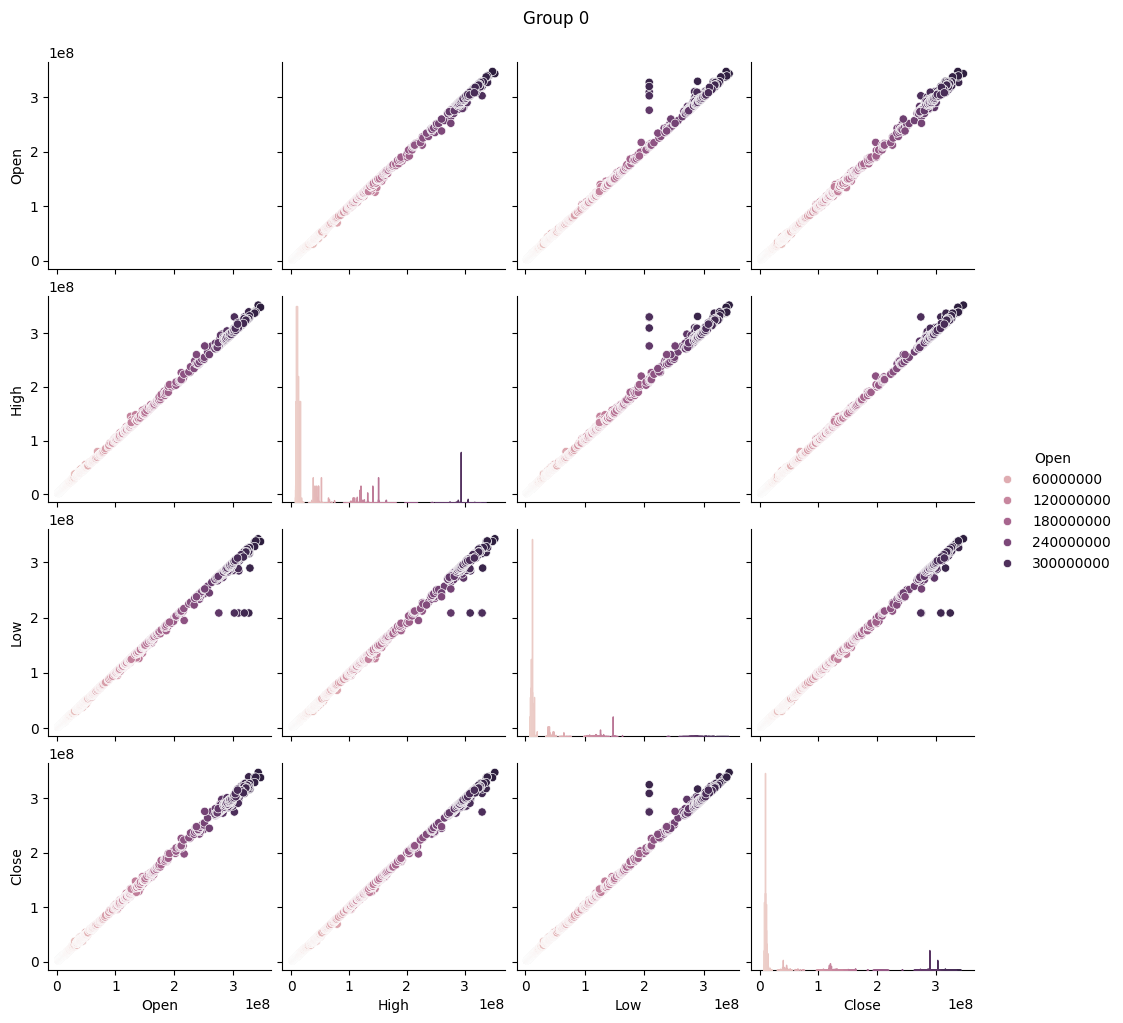

('Las columnas con un mayor umbral_corr al establecido son',
 ['Open', 'High', 'Low', 'Close'])

In [35]:
plot_features_num_regression(df_gold1,"Open", columns=['Date', 'weekday', 'Open', 'High', 'Low', 'Close'], umbral_corr=0.5, pvalue=None)

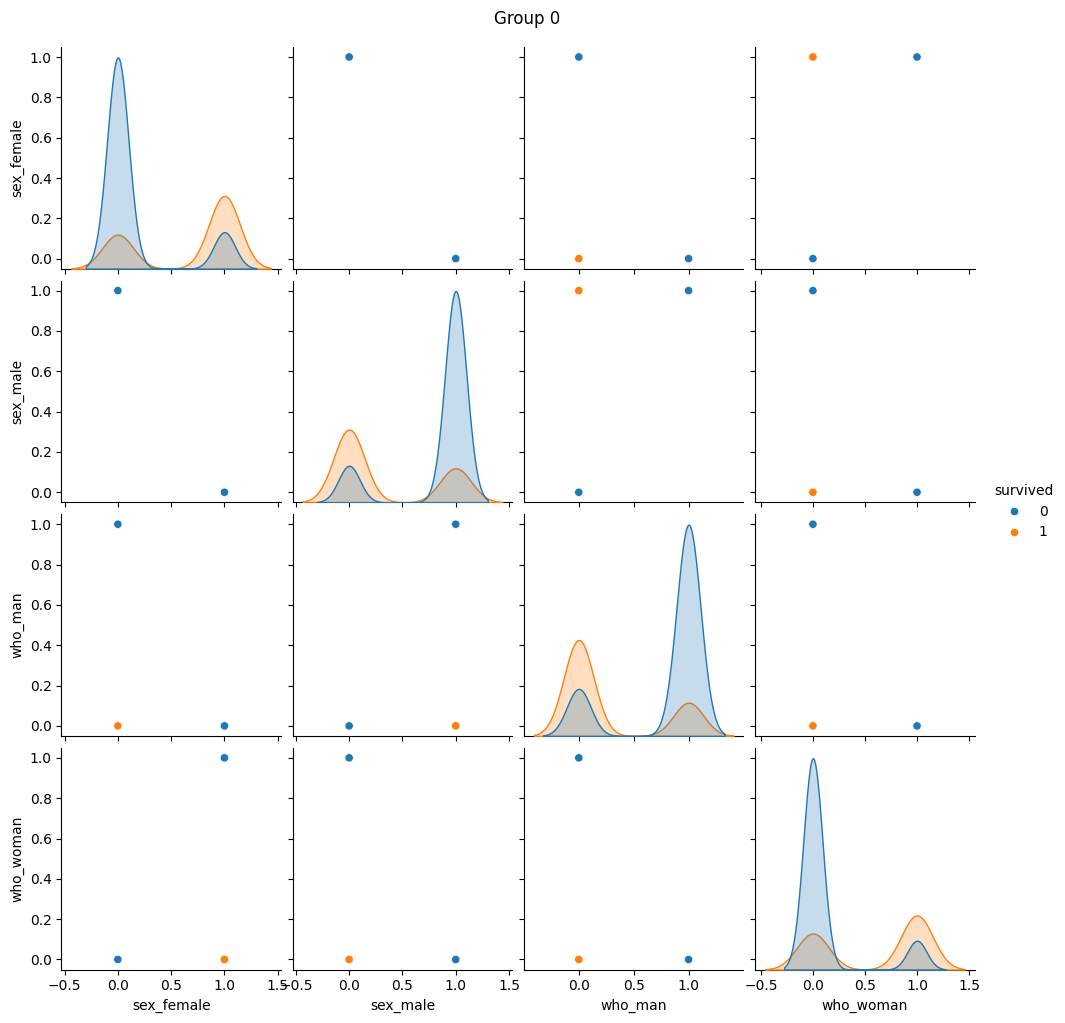

('Las columnas con un mayor umbral_corr al establecido son',
 ['sex_female', 'sex_male', 'who_man', 'who_woman'])

In [36]:

plot_features_num_regression(df_prueba, "survived", columns=['pclass', 'alone_num', 'sex_female', 'sex_male','who_child', 'who_man', 'who_woman', 'embark_town_Cherbourg','embark_town_Queenstown', 'embark_town_Southampton', 'sibsp_log',
       'parch_log', 'fare_log', 'age_log'], umbral_corr=0.5, pvalue=None)


In [37]:
df_prueba.columns

Index(['survived', 'pclass', 'alone_num', 'sex_female', 'sex_male',
       'who_child', 'who_man', 'who_woman', 'embark_town_Cherbourg',
       'embark_town_Queenstown', 'embark_town_Southampton', 'sibsp_log',
       'parch_log', 'fare_log', 'age_log'],
      dtype='object')

In [38]:
for col in df_prueba.columns:
# Calcular la correlación de Pearson
    corr, pv = pearsonr(df_prueba[col], df_prueba["survived"])

    print("Correlación de Pearson:", corr)
    print("Valor p:", pv)

Correlación de Pearson: 1.0
Valor p: 0.0
Correlación de Pearson: -0.33848103596101514
Valor p: 2.5370473879814938e-25
Correlación de Pearson: -0.20336708569989217
Valor p: 9.009490179329591e-10
Correlación de Pearson: 0.543351380657756
Valor p: 1.406066130879422e-69
Correlación de Pearson: -0.543351380657756
Valor p: 1.406066130879422e-69
Correlación de Pearson: 0.13610698067319443
Valor p: 4.5812945855265606e-05
Correlación de Pearson: -0.5570800422053263
Valor p: 8.998259162089008e-74
Correlación de Pearson: 0.5065618579881883
Valor p: 3.009425929549173e-59
Correlación de Pearson: 0.16824043121823323
Valor p: 4.3971513298067187e-07
Correlación de Pearson: 0.003650382683972031
Valor p: 0.9133532352434239
Correlación de Pearson: -0.15566027340439337
Valor p: 3.036111064521981e-06
Correlación de Pearson: 0.11482191033815219
Valor p: 0.0005948703107226845
Correlación de Pearson: 0.14707119874112148
Valor p: 1.0440335562589968e-05
Correlación de Pearson: 0.1070000588172296
Valor p: 0.0013

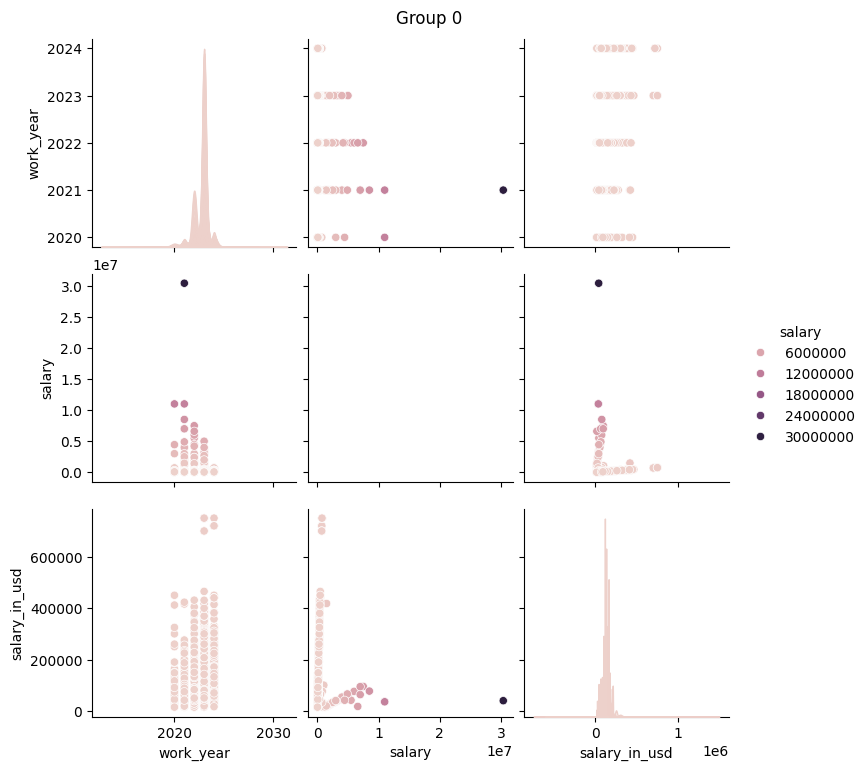

('Las columnas con un mayor umbral_corr al establecido son',
 ['work_year', 'salary', 'salary_in_usd'])

In [39]:
plot_features_num_regression(df_tool, "salary", columns=['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'], umbral_corr=0, pvalue=None)

In [40]:
df_tool.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [41]:
for col in df_tool.columns:
    if pd.api.types.is_numeric_dtype(df_tool[col]):
    # Calcular la correlación de Pearson
        corr, pv = pearsonr(df_tool[col], df_tool["salary"])

        print("Correlación de Pearson:", corr)
        print("Valor p:", pv)

Correlación de Pearson: -0.08496624343963287
Valor p: 3.196947976979058e-19
Correlación de Pearson: 1.0
Valor p: 0.0
Correlación de Pearson: 0.08613730124127074
Valor p: 1.0305321256863541e-19


In [103]:
df_lego.columns

Index(['toy_name', 'colection', 'price', 'discount', 'age', 'pieces',
       'calification', 'llavero', 'original', 'adult'],
      dtype='object')

In [105]:
for col in df_lego.columns:
    if pd.api.types.is_numeric_dtype(df_lego[col]):
    # Calcular la correlación de Pearson
        corr, pv = pearsonr(df_lego[col], df_lego["pieces"])

        print("Correlación de Pearson:", corr)
        print("Valor p:", pv)

Correlación de Pearson: 0.9020013552161209
Valor p: 0.0
Correlación de Pearson: -0.04367282770457136
Valor p: 0.12689354544581857
Correlación de Pearson: 0.6507497984712861
Valor p: 3.341460144656653e-148
Correlación de Pearson: 0.9999999999999997
Valor p: 0.0
Correlación de Pearson: 0.13272096682196338
Valor p: 3.2036572628629505e-06
Correlación de Pearson: -0.14982328069257458
Valor p: 1.4102177611913252e-07
Correlación de Pearson: 0.026119296477398402
Valor p: 0.36142640090750605
Correlación de Pearson: 0.6505217425213069
Valor p: 4.576467897565841e-148


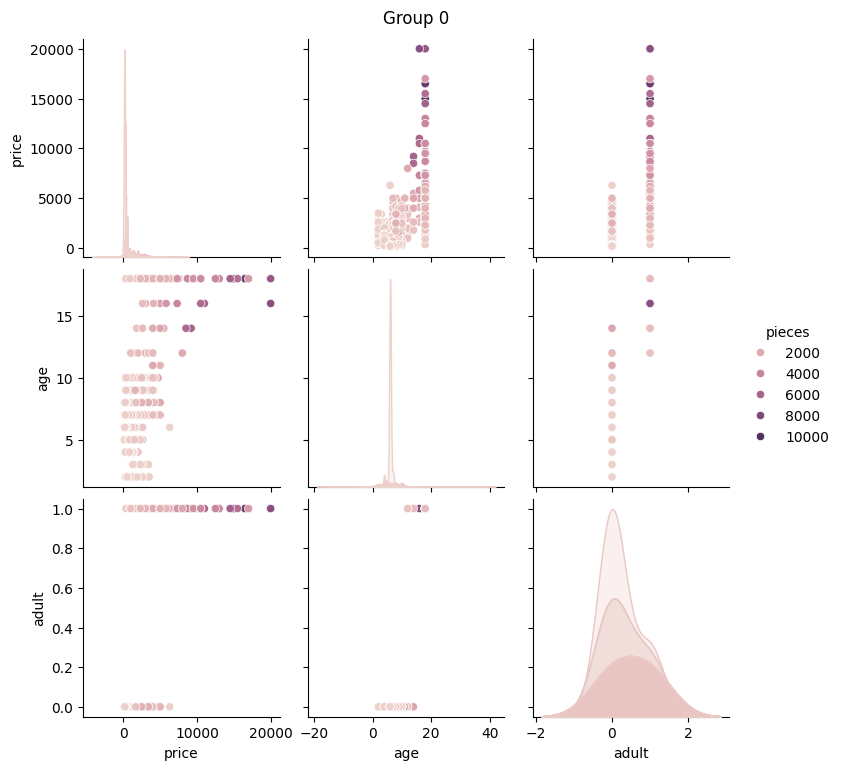

('Las columnas con un mayor umbral_corr al establecido son',
 ['price', 'age', 'adult'])

In [104]:
plot_features_num_regression(df_lego,"pieces", columns=['toy_name', 'colection', 'price', 'discount', 'age',
       'calification', 'llavero', 'original', 'adult'], umbral_corr=0.5, pvalue=None)

### Funcion: get_features_cat_regression

In [42]:



def get_features_cat_regression(df, target, cardin= 0, pvalue=0.05):
    # Comprobar si 'target' es una columna numérica continua
    if target not in df.columns or not pd.api.types.is_numeric_dtype(df[target]):
        print(f"La columna '{target}' no es una variable numérica continua.")
        return None

    # comprobar y obtener columnas categóricas con cardinalidad superior a la establecida
    columnas_cat = [col for col in df.columns if not pd.api.types.is_numeric_dtype(df[col])
                           and df[col].nunique()/len(df)*100 > cardin]

    if not columnas_cat:
        print("No existen columnas categóricas en el DataFrame")
        return None
    
     # Declarar variables fuera del bucle
    columnas_significativas = []
    corr = None  # Inicializar a None para el caso en que no haya ninguna columna significativa
    pv = None
    chi2_stat = None
    chi2_pvalue = None
    ttest_pvalue = None
    contingency_table = None
  
    # Realizar pruebas de correlación y almacenar columnas estadisticamente  significativas
    for col in columnas_cat:
        # Comprobar si 'col' es una columna categórica
        if not pd.api.types.is_numeric_dtype(df[col]):
            print(f"Advertencia: La columna '{col}' es de tipo categórico, se ignorará en el análisis.")
            continue
       
        # Realizar prueba de correlación de Pearson
        corr, pv = pearsonr(df[col], df[target])

        # Realizar prueba chi-cuadrado
        contingency_table = pd.crosstab(df[col], df[target])
        chi2_stat, chi2_pvalue, _, _ = chi2_contingency(contingency_table)

        # Realizar prueba t de Student
        _, ttest_pvalue = f_regression(df[col], df[target])

        # Seleccionar el método de prueba en base al p-value
        if pv < pvalue or chi2_pvalue < pvalue or ttest_pvalue < pvalue:
            columnas_significativas.append((col, 'pearson' if pv < pvalue else 'chi2_test' if chi2_pvalue < pvalue else 't_test'))
     
    return columnas_significativas



In [43]:
cardinalidad_tool= df_tool.nunique()/len(df_tool)*100
cardinalidad_tool


job_title              1.190584
experience_level       0.036078
employment_type        0.036078
work_models            0.027059
work_year              0.045098
employee_residence     0.784703
salary                16.532876
salary_currency        0.198431
salary_in_usd         19.365022
company_location       0.676468
company_size           0.027059
dtype: float64

In [59]:
get_features_cat_regression(df_tool, "salary", cardin= 0 , pvalue=0.05)

Advertencia: La columna 'job_title' es de tipo categórico, se ignorará en el análisis.
Advertencia: La columna 'experience_level' es de tipo categórico, se ignorará en el análisis.
Advertencia: La columna 'employment_type' es de tipo categórico, se ignorará en el análisis.
Advertencia: La columna 'work_models' es de tipo categórico, se ignorará en el análisis.
Advertencia: La columna 'employee_residence' es de tipo categórico, se ignorará en el análisis.
Advertencia: La columna 'salary_currency' es de tipo categórico, se ignorará en el análisis.
Advertencia: La columna 'company_location' es de tipo categórico, se ignorará en el análisis.
Advertencia: La columna 'company_size' es de tipo categórico, se ignorará en el análisis.


[]

In [45]:
cardinalidad_gold1= df_gold1.nunique()/len(df_gold1)*100
cardinalidad_gold1

Date       99.038236
weekday     0.164204
Open       74.290406
High       66.408632
Low        66.666667
Close      66.737040
dtype: float64

In [60]:
get_features_cat_regression(df_gold1, "Open", cardin=0, pvalue=0.05)

Advertencia: La columna 'Date' es de tipo categórico, se ignorará en el análisis.


[]

In [47]:
cardinalidad_prueba= df_prueba.nunique()/len(df_prueba)*100
cardinalidad_prueba

survived                    0.224467
pclass                      0.336700
alone_num                   0.224467
sex_female                  0.224467
sex_male                    0.224467
who_child                   0.224467
who_man                     0.224467
who_woman                   0.224467
embark_town_Cherbourg       0.224467
embark_town_Queenstown      0.224467
embark_town_Southampton     0.224467
sibsp_log                   0.785634
parch_log                   0.785634
fare_log                   27.833895
age_log                     9.988777
dtype: float64

In [48]:
get_features_cat_regression(df_prueba,"survived", cardin=0,pvalue=0.05)

No existen columnas categóricas en el DataFrame


In [114]:
get_features_cat_regression(df_lego,"pieces", cardin=0,pvalue=0.05)

Advertencia: La columna 'toy_name' es de tipo categórico, se ignorará en el análisis.
Advertencia: La columna 'colection' es de tipo categórico, se ignorará en el análisis.


[]

In [107]:
cardinalidad_lego= df_lego.nunique()/len(df_lego)*100
cardinalidad_lego

toy_name        90.842191
colection        2.943581
price            7.931316
discount         0.408831
age              1.144726
pieces          58.135732
calification     2.698283
llavero          0.163532
original         0.163532
adult            0.163532
dtype: float64

### Funcion: plot_features_cat_regression

In [57]:
#el parámetro 'wirh_indivual_plot, controla si debe generar o no histogramas individuales para cada combinación de variables categóricas y la columna objetivo con relacion significativa.
# si esta en False solo devuelve una lista de columnas categoricas o este caso numericas con significacion  y si es True las pintara
def plot_features_cat_regression(df, target, columns=None, pvalue=0.05, with_individual_plot=False):
    # Si la lista de columnas no se proporciona, seleccionar las variables numéricas del DataFrame
    if not columns:
        columns = df.select_dtypes(include='number').columns.tolist()

    # Inicializar la lista de columnas significativas
    columnas_cat = []

    # Iterar sobre las columnas
    for col in columns:
        # Verificar que los datos en la columna son numéricos
        if pd.to_numeric(df[col]).isna().any():
            print(f"Advertencia: La columna '{col}' contiene valores no numéricos, se ignorará en el análisis.")
            continue

        # Realizar prueba de chi-cuadrado
        contingency_table = pd.crosstab(df[col], df[target])
        chi2_stat, chi2_pvalue, _, _ = chi2_contingency(contingency_table)

        # Seleccionar el método de prueba en base al p-value
        if chi2_pvalue < pvalue:
            columnas_cat.append(col)

            # Generar histogramas individuales si se requiere
            if with_individual_plot:
                plt.figsize=(10,5)
                sns.histplot(data=df, x=col, hue=target, multiple="stack", bins=20,)
                plt.title(f'Histograma para {col} agrupado por {target}')
                plt.show()

    return "Las columnas seleccionadas son:", columnas_cat



In [50]:
df_tool.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

In [51]:
plot_features_cat_regression(df_tool, "salary", columns=None,  pvalue=0.05, with_individual_plot=False)

('Las columnas seleccionadas son:', ['work_year', 'salary', 'salary_in_usd'])

In [52]:
plot_features_cat_regression(df_gold1, "Open",columns=None, pvalue=0.05, with_individual_plot=False)

('Las columnas seleccionadas son:', ['Open', 'High', 'Low', 'Close'])

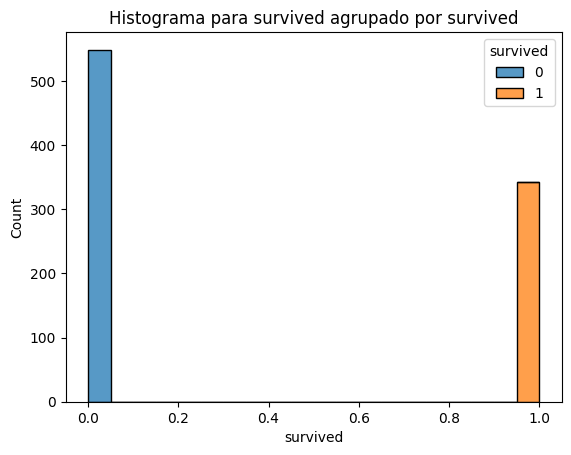

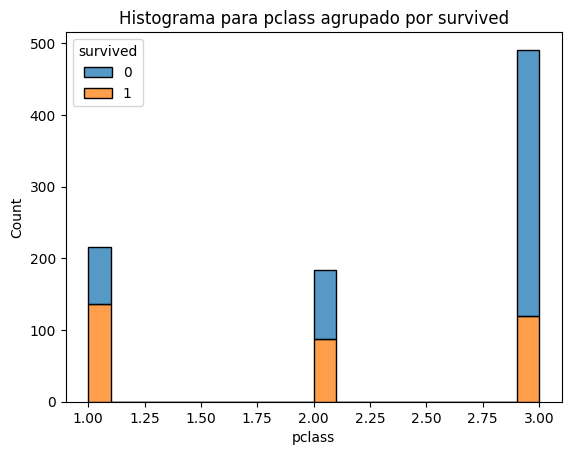

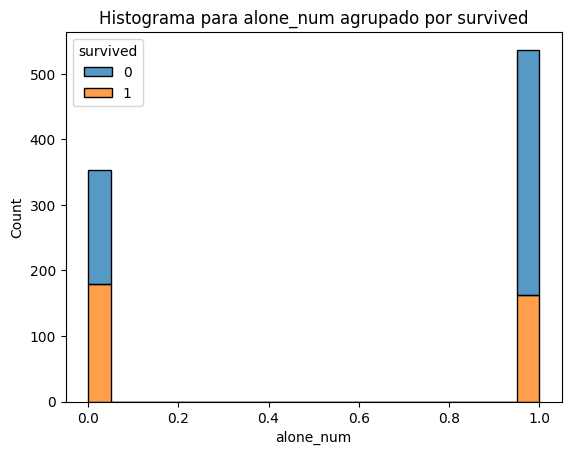

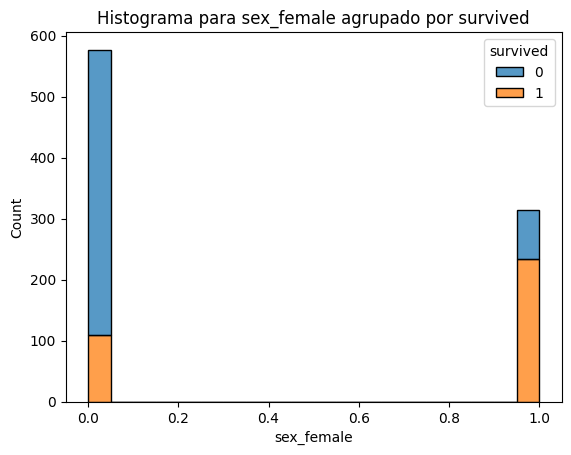

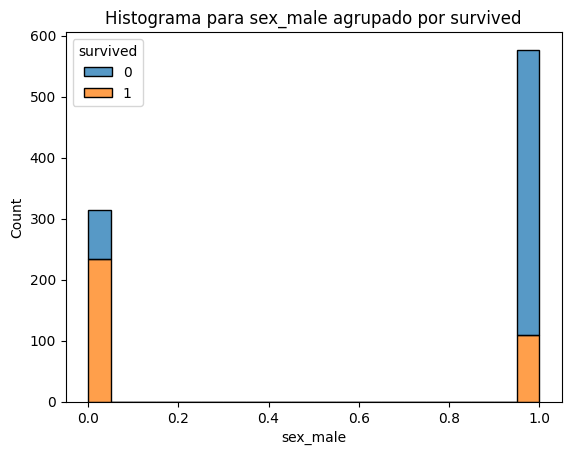

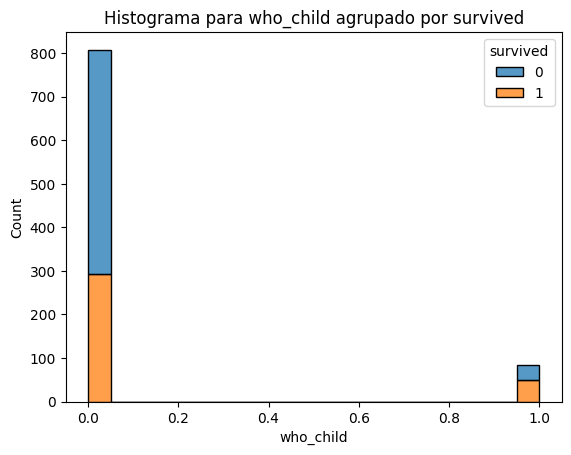

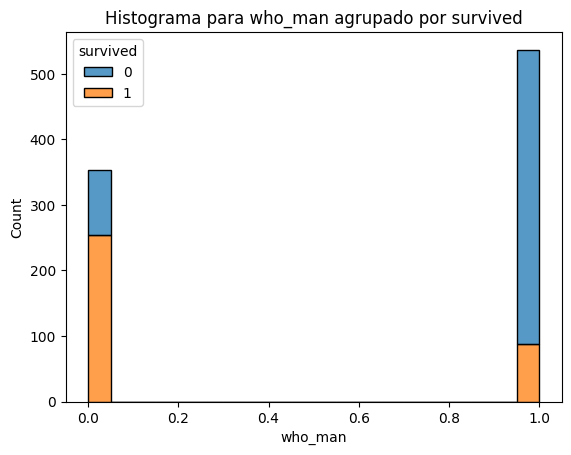

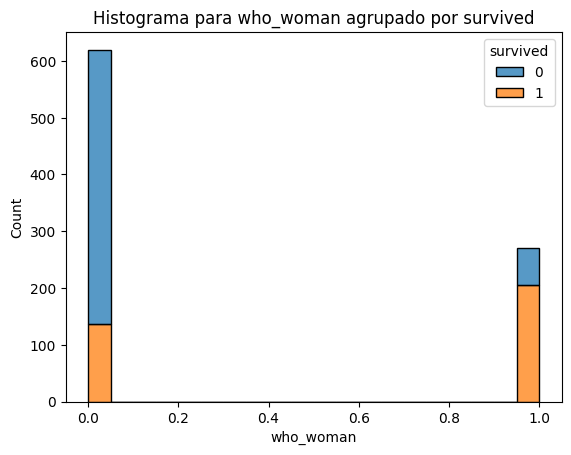

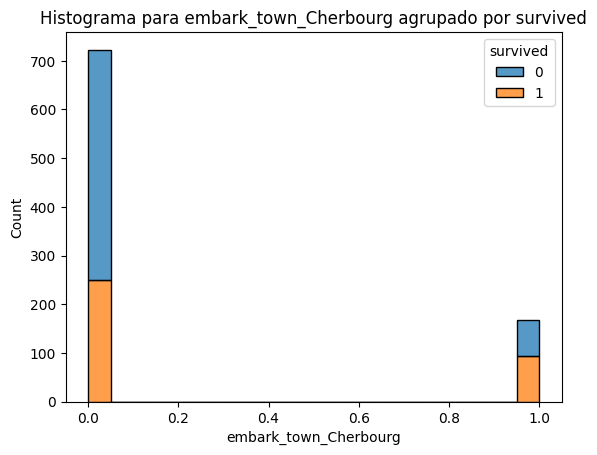

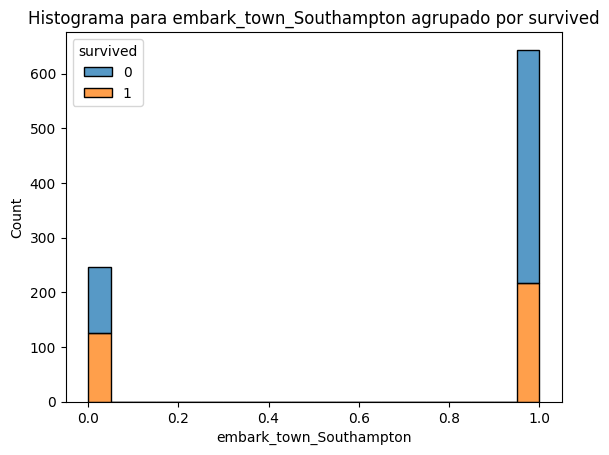

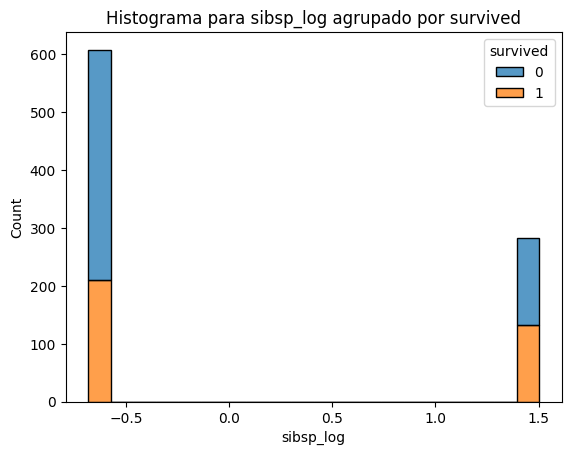

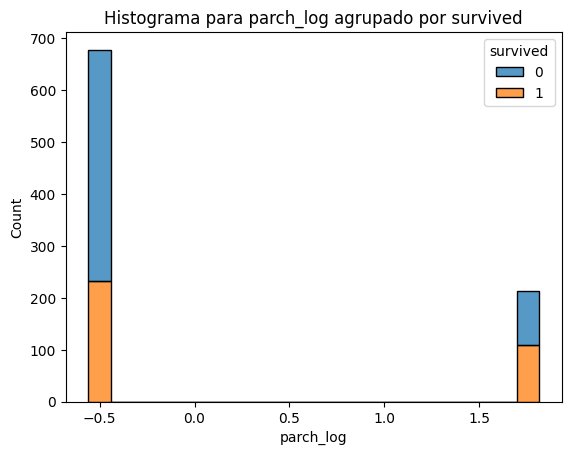

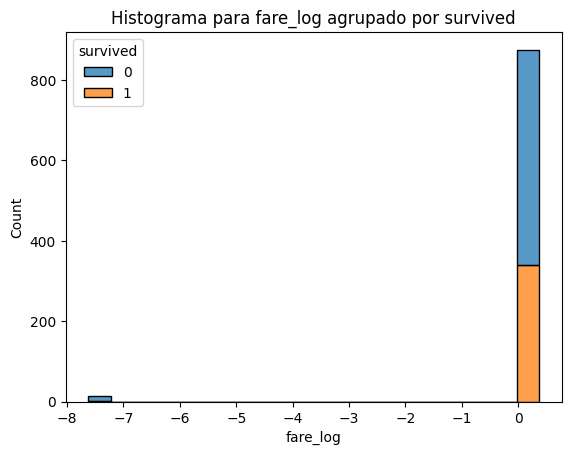

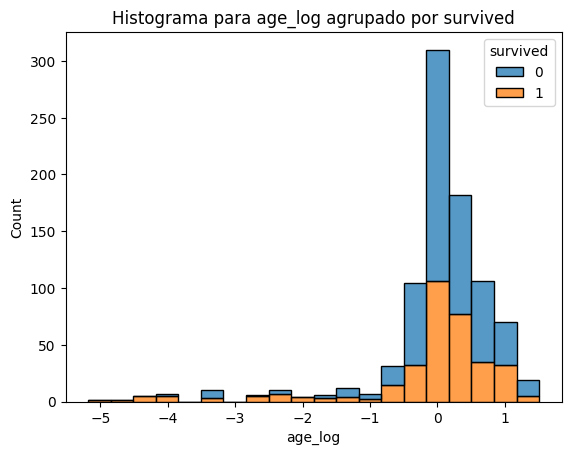

('Las columnas seleccionadas son:',
 ['survived',
  'pclass',
  'alone_num',
  'sex_female',
  'sex_male',
  'who_child',
  'who_man',
  'who_woman',
  'embark_town_Cherbourg',
  'embark_town_Southampton',
  'sibsp_log',
  'parch_log',
  'fare_log',
  'age_log'])

In [58]:
plot_features_cat_regression(df_prueba, "survived",columns=None, pvalue=0.05, with_individual_plot=True)

In [117]:
plot_features_cat_regression(df_lego, "pieces",columns=None, pvalue=0.05, with_individual_plot=False)

('Las columnas seleccionadas son:',
 ['price', 'discount', 'age', 'pieces', 'calification'])